# Lista 2

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
from skimage.feature import corner_harris, corner_peaks
from skimage import io, color


In [2]:
def show_image(I):
    plt.imshow(I, cmap='gray')
    plt.show()

In [3]:
def normalize_image(I):
    return (I - I.min()) / (I.max() - I.min())

In [4]:
def calculate_sobel(I):
    I = I.copy()
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    I = np.pad(I, 1, mode='reflect')  # Changed to reflect mode
    dx = correlate2d(I, sobel_x, mode='valid')
    dy = correlate2d(I, sobel_y, mode='valid')
    return dx, dy

In [5]:
def get_second_derivatives(dx, dy, sigma=1):
    dxdx = cv2.GaussianBlur(dx * dx, (3, 3), sigma)
    dydy = cv2.GaussianBlur(dy * dy, (3, 3), sigma)
    dxdy = cv2.GaussianBlur(dx * dy, (3, 3), sigma)
    return dxdx, dydy, dxdy

In [6]:
def harris_corner_detection(I, k=0.05):
    dx, dy = calculate_sobel(I)
    Ixx, Iyy, Ixy = get_second_derivatives(dx, dy)

    # Paso 3: Calcular el determinante y la traza de la matriz M
    det_M = Ixx * Iyy - Ixy**2
    trace_M = Ixx + Iyy

    # Paso 4: Calcular la respuesta de Harris
    R = det_M - k * (trace_M**2)
    
    return R

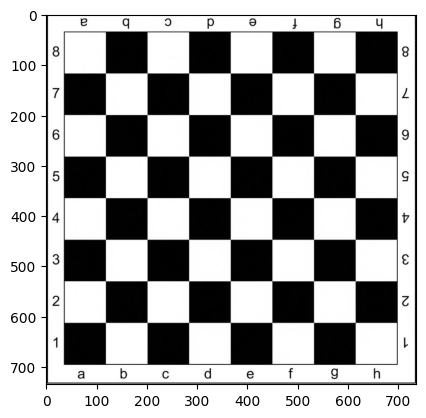

In [7]:
I1 = cv2.imread('images/chess.jpg', cv2.IMREAD_GRAYSCALE)
I1 = normalize_image(I1)
show_image(I1)

In [8]:
def plot_harris_result(I, thresh):
    R = harris_corner_detection(I, k=0.05)
    corners = (R > thresh)
    plt.figure()
    plt.imshow(I, cmap='gray')
    plt.plot(np.where(corners)[1], np.where(corners)[0], 'r.')
    plt.show()


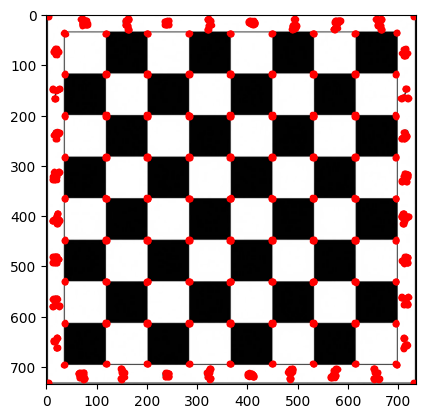

In [9]:
plot_harris_result(I1, 0.01)

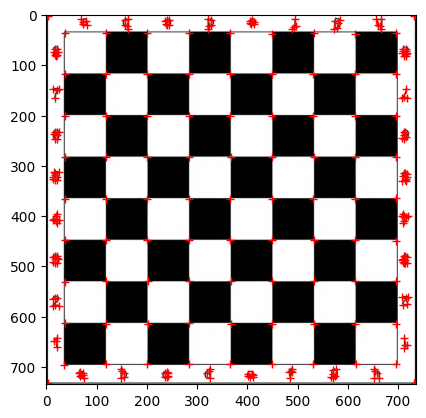

In [10]:
harris_response = corner_harris(I1)
corners = corner_peaks(harris_response, min_distance=1, threshold_abs=0.001, threshold_rel=0.01)
plt.figure()
plt.imshow(I1, cmap='gray')
plt.plot(corners[:, 1], corners[:, 0], 'r+')
plt.show()

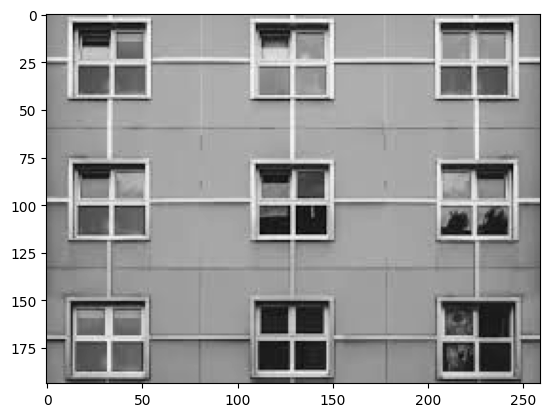

In [11]:
I2 = cv2.imread('images/ventanas.jpeg', cv2.IMREAD_GRAYSCALE)
I2 = normalize_image(I2)
show_image(I2)

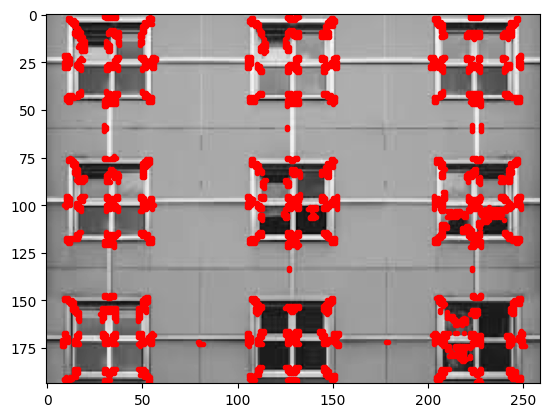

In [12]:
plot_harris_result(I2, 0.01)

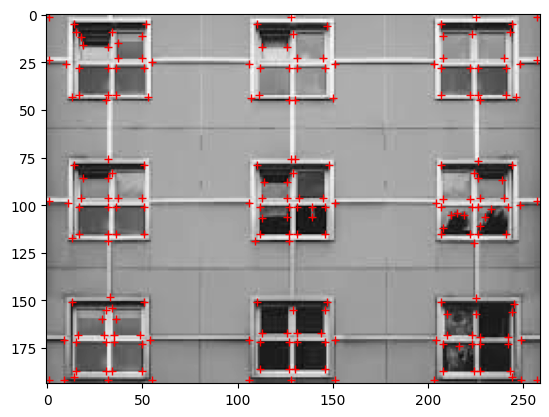

In [13]:
harris_response = corner_harris(I2)
corners = corner_peaks(harris_response, min_distance=1, threshold_abs=0.001, threshold_rel=0.01)
plt.figure()
plt.imshow(I2, cmap='gray')
plt.plot(corners[:, 1], corners[:, 0], 'r+')
plt.show()

Como se observa en las imágenes para el tablero de ajedrez y las ventanas, la diferencia entre los resultados del algoritmo implementado y el de skimage, radica en la finura de las esquinas. Sin embargo, en ambos casos se logran identificar esquinas muy similares.